### Boosting Techniques

1. What is Boosting in Machine Learning? Explain how it improves weak
learners.
- Boosting is an ensemble technique that builds many weak learners sequentially, where each new model focuses on correcting the errors of the previous ones, and their weighted outputs are combined into a single strong predictor; this iterative reweighting/fitting process typically reduces bias and improves generalization compared with a single learner. Classic implementations include AdaBoost, which upweights misclassified samples at each round, and Gradient Boosting, which fits new learners to the residuals, both turning simple base models (often shallow trees) into a powerful aggregated model.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
- AdaBoost trains learners sequentially by reweighting training samples: after each round, it increases weights on misclassified points and assigns a model weight based on its error, then combines learners in a weighted vote/sum. Gradient Boosting instead fits each new learner to the current residuals/negative gradients of a chosen loss function, effectively doing stagewise gradient descent on the loss, and combines learners by additive updates with a learning rate. In short, AdaBoost adapts sample weights; Gradient Boosting follows gradients of a loss via residual fitting.

3. How does regularization help in XGBoost?
- Boosting is an ensemble method that turns many weak learners (typically shallow trees) into a strong model by training them sequentially, each new learner focusing on the current errors and then adding its weighted contribution to the ensemble to reduce overall loss. In XGBoost, regularization improves these weak learners’ generalization by penalizing model complexity directly in the objective (L1/“alpha” sparsifies leaf weights; L2/“lambda” shrinks them), using shrinkage to make each tree’s step conservative, and applying tree-wise controls like min_child_weight, max_depth, subsampling, and gamma so the ensemble fits signal while resisting noise-driven splits.

4. Why is CatBoost considered efficient for handling categorical data?
- CatBoost is efficient for categorical data because it natively encodes categories during training using ordered (leakage-avoiding) target statistics and specialized one-hot for low-cardinality features, eliminating heavy pre-processing and reducing overfitting from naive target encoding. Its ordered boosting scheme learns encodings using only prior samples, which curbs target leakage and handles high-cardinality features (like ZIP codes or IDs) without exploding dimensionality, leading to strong accuracy and fast training on real-world tabular data with many categories.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
- Boosting is often preferred in applications requiring high accuracy with complex decision boundaries and subtle interactions, such as click-through rate prediction and ad ranking, credit risk scoring, and fraud detection where small signals must be amplified in noisy data. It is also widely used in structured/tabular competitions and production systems (e.g., XGBoost/LightGBM) for tasks like churn prediction and demand forecasting because sequential learners reduce bias and capture nonlinearities more effectively than bagging alone. In domains like medical diagnosis and anomaly detection, boosting’s focus on hard-to-classify cases improves sensitivity at practical thresholds, though it requires careful regularization to avoid overfitting on noise.

In [1]:
""" 6. Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy """

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9561


In [2]:
""" 7. Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score """

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing(as_frame=False)
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (test): {r2:.4f}")

R-squared (test): 0.7756


In [8]:
""" 8. Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy """

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    n_estimators=300,
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_grid = {
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    refit=True
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best parameters:", grid.best_params_)
print(f"CV Best Score (mean accuracy): {grid.best_score_:.4f}")
print(f"Test Accuracy: {acc:.4f}")

Best parameters: {'learning_rate': 0.05}
CV Best Score (mean accuracy): 0.9692
Test Accuracy: 0.9474


Test Accuracy: 0.9649


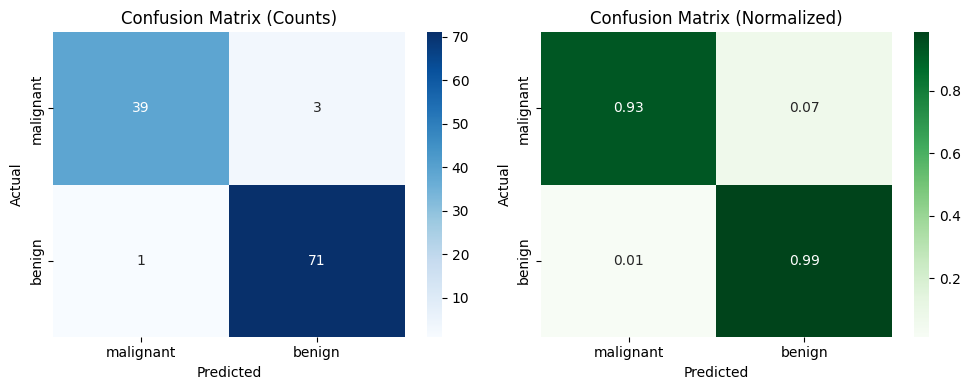

In [7]:
""" 9. Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn"""
!pip install catboost seaborn scikit-learn matplotlib -q

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
class_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    random_seed=42,
    verbose=False
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix (Counts)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("Confusion Matrix (Normalized)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

1) Data preprocessing: build time-aware splits to avoid leakage; impute numeric features with median and add missing-value indicators; for categorical features, prefer native handling (CatBoost) or target-safe encodings (ordered/mean encoding with out-of-fold scheme) if using XGBoost/AdaBoost; engineer behavior aggregates (rolling delinquency counts, utilization ratios, recent-to-historic spend, income volatility), clip outliers, and standardize only for linear benchmarks.

2) Model choice: start with CatBoost for mixed tabular data because it natively handles categorical variables and missing values with ordered target statistics; benchmark XGBoost when features are mostly numeric or when GPU/latency is critical; keep AdaBoost as a simple, high-bias baseline or when shallow stumps suffice under strict interpretability constraints.

3) Hyperparameter tuning: use stratified, time-aware cross-validation with early stopping on a validation fold; tune learning_rate, iterations/estimators, depth/max_depth, L2/L1 regularization, min_child_weight, subsample and colsample, and class weights/scale_pos_weight; prefer Bayesian/Optuna or coarse-to-fine grids, then probability calibration (Platt/isotonic) for threshold setting.

4) Imbalance and overfitting: set class weights or scale_pos_weight; avoid naive oversampling on full data—if sampling is used, do it within CV folds; constrain depth, use regularization and subsampling, and rely on early stopping; monitor drift via rolling backtests and retrain on a cadence.

5) Evaluation: optimize PR-AUC and recall at a fixed high precision (to cap false positives), report ROC-AUC, balanced accuracy, F1, and cost-based metrics (expected loss using PD×LGD×EAD); pick an operating threshold from validation; assess calibration (Brier score, calibration curve) and stability by segments (product, geography, income band); provide SHAP global and local explanations for governance.

6) Business benefit: improved default discrimination lowers credit losses and enables risk-based pricing/limits; calibrated PDs support provisioning and capital allocation; controlling false positives preserves approvals and customer experience; explainable, monitored boosting models enhance compliance, auditability, and portfolio stability over time.